In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2, os, glob
import numpy as np

from natsort import natsorted as ns

# os.chdir('/content/drive/MyDrive/Cephalogram')
# import ceph_config as cf

# our modules
import utils.ceph_config as cf

In [3]:
# from utils_img import process_image, calculate_features
# from calc_main import calc_output

from utils.utils_img import process_image, calculate_features
from utils.calc_main import calc_output

In [4]:
cf.RESOLUTION_CONFIG

32

In [5]:
# image_path : 공유 드라이브 내 저장된 이미지로 수정해야 함.

# RESOLUTION_CONFIG = 16

image_path = os.path.join(os.getcwd(), 'JPEGImages')
save_path  = os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}')

os.makedirs(save_path, exist_ok=True)

In [6]:
print(ns(glob.glob(f'{image_path}/*.png'))[:5])
print(len(os.listdir(image_path)))

['/content/drive/MyDrive/Cephalogram/JPEGImages/S0041.png', '/content/drive/MyDrive/Cephalogram/JPEGImages/S0042.png', '/content/drive/MyDrive/Cephalogram/JPEGImages/S0043.png', '/content/drive/MyDrive/Cephalogram/JPEGImages/S0044.png', '/content/drive/MyDrive/Cephalogram/JPEGImages/S0045.png']
866


In [7]:
image = []
feature = []
binary_array = []
int_array = []

image_origin = ns(glob.glob(f'{image_path}/*.png'))

# for i, img_path in enumerate(image_origin):
#     print(img_path)
#     output_image, features, binary_randarray = calc_output(size, img_path)

#     image.append(output_image)
#     feature.append(features)
#     binary_array.append(np.array(binary_randarray))

for i, img_path in enumerate(image_origin):
    print(img_path)

    for j in range(8):
        output_image, features, binary_randarray = calc_output(cf.RESOLUTION_CONFIG, j, img_path)

        image.append(output_image)
        feature.append(features)
        binary_array.append(binary_randarray)
        int_array.append(j)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[Log] Binary array (3) : 011
[Log] Binary array (4) : 100
[Log] Binary array (5) : 101
[Log] Binary array (6) : 110
[Log] Binary array (7) : 111
/content/drive/MyDrive/Cephalogram/JPEGImages/S0392.png
[Log] Binary array (0) : 000
[Log] Binary array (1) : 001
[Log] Binary array (2) : 010
[Log] Binary array (3) : 011
[Log] Binary array (4) : 100
[Log] Binary array (5) : 101
[Log] Binary array (6) : 110
[Log] Binary array (7) : 111
/content/drive/MyDrive/Cephalogram/JPEGImages/S0393.png
[Log] Binary array (0) : 000
[Log] Binary array (1) : 001
[Log] Binary array (2) : 010
[Log] Binary array (3) : 011
[Log] Binary array (4) : 100
[Log] Binary array (5) : 101
[Log] Binary array (6) : 110
[Log] Binary array (7) : 111
/content/drive/MyDrive/Cephalogram/JPEGImages/S0394.png
[Log] Binary array (0) : 000
[Log] Binary array (1) : 001
[Log] Binary array (2) : 010
[Log] Binary array (3) : 011
[Log] Binary array (4) : 100
[Log] Binary array (5) : 101
[Log] Binary 

In [8]:
image_arr = np.array(image)
feature_arr = np.array(feature)
binary_array_arr = np.array(binary_array)
int_array_arr = np.array(int_array)

print(image_arr.shape)
print(feature_arr.shape)
print(binary_array_arr.shape)
print(int_array_arr.shape)

(6928, 32, 32)
(6928, 96)
(6928, 3)
(6928,)


### Test

In [9]:
print(np.max(image))
print(np.min(image))

1.0
0.0


(32, 32)


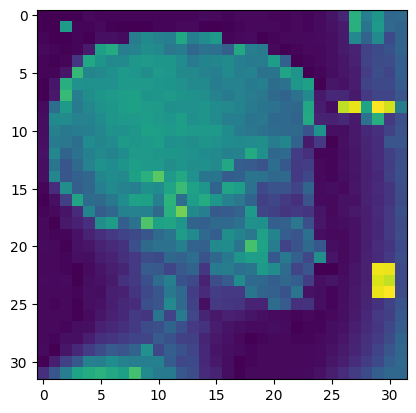

In [10]:
import matplotlib.pyplot as plt

print(image_arr[0].shape)
plt.imshow(image_arr[0])

In [11]:
binary_array_arr[:10]

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [12]:
int_array_arr[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1])

### Save

In [13]:
# 각각 저장
print(save_path)

os.makedirs(os.path.join(save_path, 'image'), exist_ok=True)
os.makedirs(os.path.join(save_path, 'feature'), exist_ok=True)
os.makedirs(os.path.join(save_path, 'array'), exist_ok=True)

# cv2.imwrite(os.path.join(save_path, 'image', image_path[:-4], '.png'), image)
np.save(os.path.join(save_path, 'image', 'image.npy'), image_arr)
np.save(os.path.join(save_path, 'feature', 'feature.npy'), feature_arr)
np.save(os.path.join(save_path, 'array', 'binary_array.npy'), binary_array_arr)
np.save(os.path.join(save_path, 'array', 'int_array.npy'), int_array_arr)

/content/drive/MyDrive/Cephalogram/output/32
